In [97]:
load("selected_nzes2011.Rdata")

In [2]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
names(selected_nzes2011)

[1] "Jelect"         "jblogel"        "jnewspaper"     "jnatradio"     
  [5] "jtalkback"      "jdiscussp"      "jrallies"       "jpersuade"     
  [9] "jpcmoney"       "jpcposter"      "jlablike"       "jnatlike"      
 [13] "jgrnlike"       "jnzflike"       "jactlike"       "junflike"      
 [17] "jmaolike"       "jmnplike"       "jmostlike"      "jmostlikex"    
 [21] "jrepublic"      "jsphealth"      "jspedu"         "jspunemp"      
 [25] "jspdefence"     "jspsuper"       "jspbusind"      "jsppolice"     
 [29] "jspwelfare"     "jspenviro"      "jgovpdk"        "jgovplab"      
 [33] "jgovpnat"       "jgovpgrn"       "jgovpnzf"       "jgovpact"      
 [37] "jgovunf"        "jgovpmao"       "jgovpmnp"       "jnevervoteno"  
 [41] "jnevervotelab"  "jnevervotenat"  "jnevervotegrn"  "jnevervotenzf" 
 [45] "jnevervoteact"  "jnevervoteunf"  "jnevervotemao"  "jnevervotemnp" 
 [49] "jnevervoteoth"  "jnevervoteothx" "jfirstpx"       "jsecondp"      
 [53] "jage"           "jlanguage"      "jlanguagex"     "jrollsex"      
 [57] "jhqual"         "jwkft"          "jwkpt"          "jwkun"         
 [61] "jwkret"         "jwkdis"         "jwksch"         "jwkunpo"       
 [65] "jwkunpi"        "jhhincome"      "jhhadults"      "jhhchn"        
 [69] "jmarital"       "r_jind"         "jlablr"         "jnatlr"        
 [73] "jgrnlr"         "jnzflr"         "jactlr"         "junflr"        
 [77] "jmaolr"         "jmnplr"         "jslflr"         "jrelservices"  
 [81] "jrelnone"       "jrelang"        "jrelpres"       "jrelcath"      
 [85] "jrelmeth"       "jrelbap"        "jrellat"        "jrelrat"       
 [89] "jrelfun"        "jrelothc"       "jrelnonc"       "jreligionx"    
 [93] "jreligiousity"  "jethnicity_e"   "jethnicity_m"   "jethnicity_p"  
 [97] "jethnicity_a"   "jethnicity_o"   "jethnicityx"    "jethnicmost"   
[101] "jethnicmostx"   "jpartyvote"     "jelecvote"      "njptyvote"     
[105] "njelecvote"     "jdiffvoting"    "X_singlefav"

In [4]:
grep("singlefav", names(selected_nzes2011), value = TRUE)

[1] "X_singlefav"

In [5]:
selected_nzes2011 %>% 
  select(jpartyvote, jdiffvoting, X_singlefav) %>% 
  str()

'data.frame':	3101 obs. of  3 variables:
 $ jpartyvote : chr  "National" "National" "National" "NZ First" ...
 $ jdiffvoting: chr  "Voting can make a reasonable amount of difference to what happens" "Voting can make some difference to what happens" "Voting can make a big difference to what happens" "Voting can make some difference to what happens" ...
 $ X_singlefav: chr  "National" "National" "National" "Labour" ...


In [7]:
selected_nzes2011 %>% 
filter(jpartyvote != "Don't know") %>%
group_by(jpartyvote) %>%
summarise(count = n())

,jpartyvote,count
1,Act,29
2,ALC,10
3,Alliance,2
4,Another party,8
5,Conservative,74
6,Green,348
7,Labour,749
8,Mana,62
9,Maori Party,128
10,National,1130


In [8]:
selected_nzes2011 %>% 
group_by (X_singlefav) %>%
summarise(count =  n())

,X_singlefav,count
1,Act,33
2,Green,388
3,Labour,1043
4,Mana,47
5,National,1266
6,NZ First,138
7,United Future,128
8,NA,58


In [12]:
selected_nzes2011 %>% 
filter(!is.na(X_singlefav)) %>%
group_by (X_singlefav) %>%
summarise(count =  n())

,X_singlefav,count
1,Act,33
2,Green,388
3,Labour,1043
4,Mana,47
5,National,1266
6,NZ First,138
7,United Future,128


In [13]:
selected_nzes2011 %>% 
filter(!is.na(X_singlefav) , jpartyvote != "Don't know") %>%
group_by (X_singlefav) %>%
summarise(count =  n())

,X_singlefav,count
1,Act,29
2,Green,354
3,Labour,914
4,Mana,42
5,National,1172
6,NZ First,119
7,United Future,115


In [15]:
selected_nzes2011 %>%
group_by (jdiffvoting) %>%
summarise(count = n())

,jdiffvoting,count
1,Don't know,63
2,Voting can make a big difference to what happens,1605
3,Voting can make a reasonable amount of difference to what happens,841
4,Voting can make some difference to what happens,339
5,Voting won't make any difference to what happens,119
6,Voting won't make much difference to what happens,106
7,NA,28


In [98]:
selected_nzes2011 <- selected_nzes2011 %>% 
  mutate (sameparty = ifelse (jpartyvote == X_singlefav, "same", "different"))

In [31]:
selected_nzes2011 %>%
group_by (jpartyvote, X_singlefav, sameparty) %>%
summarise (count = n()) %>% head()

,jpartyvote,X_singlefav,sameparty,count
1,Act,Act,same,12
2,Act,Green,different,1
3,Act,National,different,14
4,Act,United Future,different,1
5,Act,NA,NA,1
6,ALC,Green,different,1


In [37]:
selected_nzes2011 %>%
group_by (jpartyvote, X_singlefav, sameparty) %>%
summarise (count = n()) %>% 
filter (sameparty == "same")

,jpartyvote,X_singlefav,sameparty,count
1,Act,Act,same,12
2,Green,Green,same,237
3,Labour,Labour,same,632
4,Mana,Mana,same,31
5,National,National,same,1004
6,NZ First,NZ First,same,82
7,United Future,United Future,same,5


In [40]:
selected_nzes2011 %>%
group_by (jpartyvote, X_singlefav, sameparty) %>%
summarise (count = n()) %>% 
filter (sameparty == "different") %>%


,jpartyvote,X_singlefav,sameparty,count
1,Act,Green,different,1
2,Act,National,different,14
3,Act,United Future,different,1
4,ALC,Green,different,1
5,ALC,Labour,different,4
6,ALC,National,different,2
7,ALC,United Future,different,3
8,Alliance,Labour,different,1
9,Alliance,National,different,1
10,Another party,Green,different,2


In [42]:
selected_nzes2011 %>%
group_by (jpartyvote, X_singlefav, sameparty) %>%
summarise (count = n()) %>% 
filter (is.na (sameparty)) 


,jpartyvote,X_singlefav,sameparty,count
1,Act,NA,NA,1
2,Conservative,NA,NA,1
3,Don't know,NA,NA,7
4,Green,NA,NA,1
5,Labour,NA,NA,11
6,Maori Party,NA,NA,2
7,National,NA,NA,7
8,NZ First,NA,NA,2
9,NA,Act,NA,4
10,NA,Green,NA,32


## Step four. Prepare for the second questoin

In [61]:
selected_nzes2011$jnzflike %>% str()

 Factor w/ 12 levels "0","1","10","2",..: 1 1 4 10 4 11 NA NA 1 12 ...


In [62]:
levels (selected_nzes2011$jnzflike)

[1] "0"          "1"          "10"         "2"          "3"         
 [6] "4"          "5"          "6"          "7"          "8"         
[11] "9"          "Don't know"

In [64]:
selected_nzes2011 %>%
group_by (jnzflike) %>%
summarise (count = n())


,jnzflike,count
1,0,622
2,1,298
3,10,134
4,2,266
5,3,227
6,4,162
7,5,544
8,6,165
9,7,138
10,8,107


In [82]:
selected_nzes2011 %>%
filter(!is.na(jage)) %>%
summarise(agmean = mean(jage, na.rm = TRUE),agmedian = median(jage), agesd = sd(jage), agemin= min(jage), agemax=max(jage))

,agmean,agmedian,agesd,agemin,agemax
1,53.22328,54.00000,17.53710,18.00000,100.00000


In [83]:
selected_nzes2011 %>% select(jnzflike, jage) %>% head()

,jnzflike,jage
1,0,37
2,0,37
3,2,28
4,8,71
5,2,43
6,9,NA


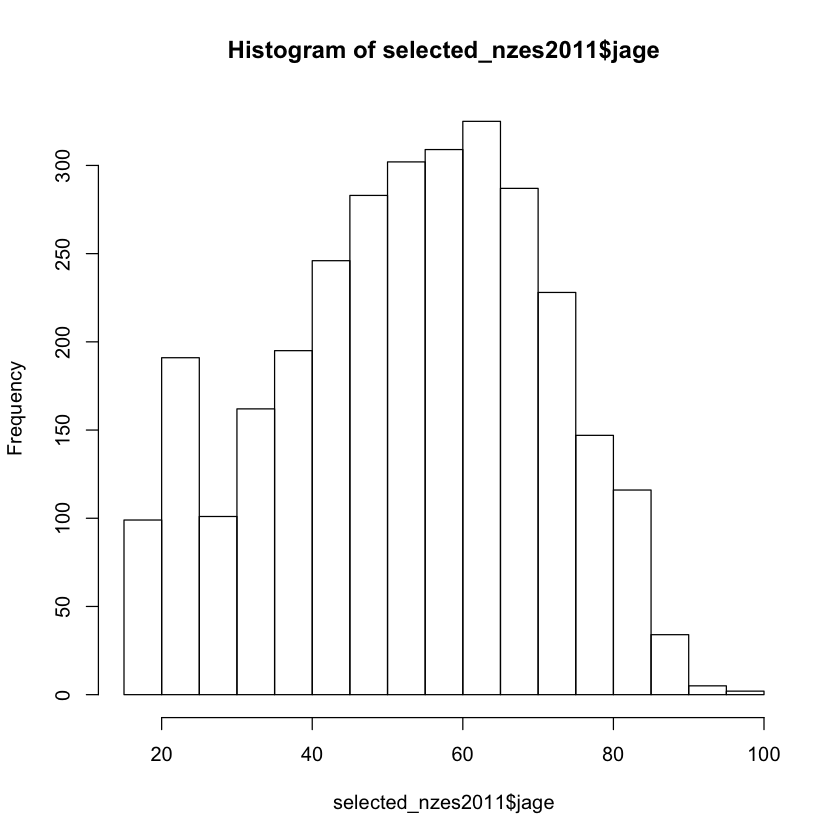

In [90]:
hist(selected_nzes2011$jage)

In [86]:
selected_nzes2011 %>% 
 filter(jnzflike %in%  c("0", "10")) %>%
 group_by(jnzflike) %>%
 summarise(count = n())

,jnzflike,count
1,0,622
2,10,134


In [99]:
selected_nzes2011 <- selected_nzes2011 %>%
mutate(retiredage = ifelse (jage >= 65, "retired age", "working age"))


In [100]:
selected_nzes2011 %>%
 group_by (retiredage) %>%
 summarise  (count = n())

,retiredage,count
1,retired age,876
2,working age,2156
3,NA,69


#####  Expected Error below, since numeric data is expected and jnzflike is a factor

In [101]:
selected_nzes2011 %>% 
  group_by(retiredage) %>% 
  summarise(medlike = median(jnzflike))

ERROR: Error in eval(expr, envir, enclos): need numeric data


In [102]:
selected_nzes2011 <- selected_nzes2011 %>% 
  mutate(numlikenzf = as.numeric(jnzflike))

In [103]:
selected_nzes2011 %>%
 group_by (jnzflike, numlikenzf) %>%
 summarise(count = n())

,jnzflike,numlikenzf,count
1,0,1,622
2,1,2,298
3,10,3,134
4,2,4,266
5,3,5,227
6,4,6,162
7,5,7,544
8,6,8,165
9,7,9,138
10,8,10,107


In [106]:
selected_nzes2011 <- selected_nzes2011 %>%
mutate (numlikenzf = as.numeric (as.character(jnzflike)))

Warning message:
In eval(substitute(expr), envir, enclos): NAs introduced by coercion

In [107]:
selected_nzes2011 %>%
 group_by (jnzflike, numlikenzf) %>%
 summarise(count = n())

,jnzflike,numlikenzf,count
1,0,0,622
2,1,1,298
3,10,10,134
4,2,2,266
5,3,3,227
6,4,4,162
7,5,5,544
8,6,6,165
9,7,7,138
10,8,8,107


In [110]:
selected_nzes2011 %>% 
  group_by(retiredage) %>% 
  summarise(medlike = median(numlikenzf, na.rm = TRUE))

,retiredage,medlike
1,retired age,4
2,working age,3
3,NA,3


In [113]:
df = data.frame(head(selected_nzes2011$jage,30), head(selected_nzes2011$numlikenzf,30))

In [114]:
df

,head.selected_nzes2011.jage..30.,head.selected_nzes2011.numlikenzf..30.
1,37,0
2,37,0
3,28,2
4,71,8
5,43,2
6,NA,9
7,59,NA
8,68,NA
9,64,0
10,70,NA


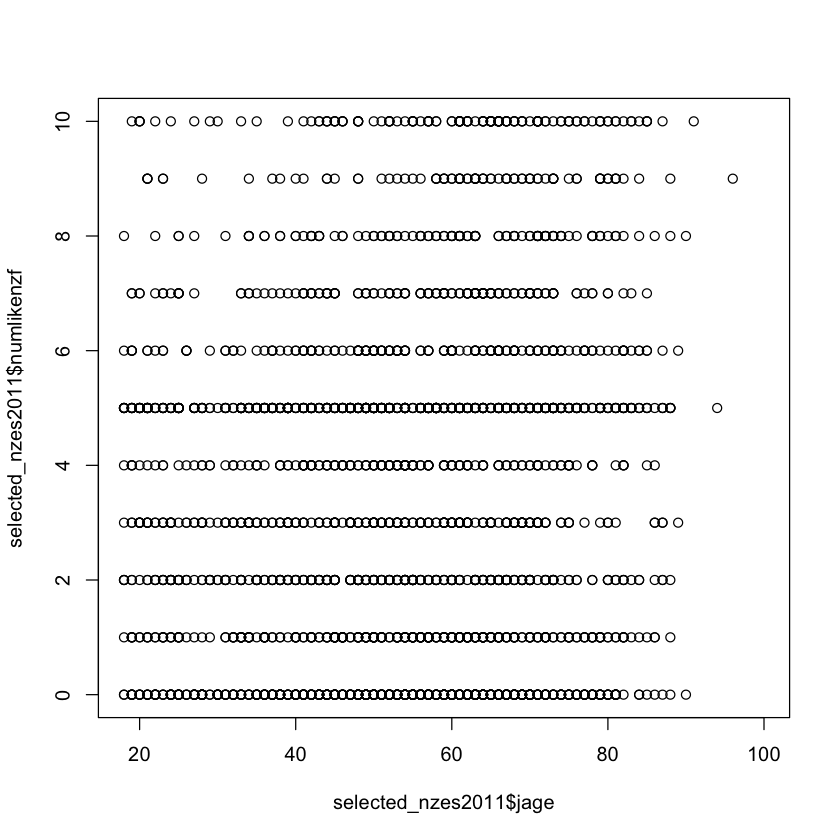

In [116]:
plot(selected_nzes2011$jage, selected_nzes2011$numlikenzf)